# Mini projet de Physique expérimentale : Ondes à la surface d’un liquide

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# Explication projet :

Dans ce projet, on cherche à caracteriser les ondes à la surface d'un liquide avec plusieurs expériences. On cherchera dans un premier temps et regarder si ces ondes obéissent bien à la relation de dispersion, avec différents liquides. On verra ensuite les phénomènes de diffraction et d'interférences en utilisant plusieurs sources d'ondes, ou encore des fentes, ce qui nous permettrera d'observer les caracéristiques des ondes, qui seront conservées ou non.

### Justification des incertitudes : 

Lors des experiences de ce projet nous avons réalisé plusieurs mesures. Ces mesures ont toutes des incertitudes de type B, dues à l'instrument de mesure et a l'expérimentateur. Donc l'expression de ces incertitudes est donc : $\frac{i}{\sqrt{12}}$ avec $i$ l'intervalle de certitude.

### Schéma du montage :

### Calcul de l'échelle :

Lors des différentes expériences, on réalise des mesures sur l'écran de la cuve à ondes, il faut donc calculer l'échelle pour pouvoir avoir les valeurs réelles de nos mesures.

On mesure de l'objet dans la réalité $14,35cm$ avec un intervalle de certitude de $0,2cm$ donc $(14,350 \pm 0,058) cm$ et on mesure de l'image sur l'écran $27,00cm$ avec un invervalle de certitude de $0,7cm$ donc $(27,00 \pm 0,21)cm$. On trouve donc que l'échelle (rapport entre la mesure réelle et ce qui est mesuré) est de $(0,5315 \pm 0,0085)$.


In [2]:
real = 14.35
ureal = 0.2/np.sqrt(12)
im = 27
uim = 0.7/np.sqrt(12)

echelle = real/im
u_echelle = np.sqrt( ((ureal)/real)**2 + ((uim)/im)**2 )
print("L'incertitude sur l'objet est :", ureal, ", l'incertitude sur l'image est", uim, " donc l'échelle est de", echelle, "avec une incertitude de", u_echelle)

L'incertitude sur l'objet est : 0.05773502691896258 , l'incertitude sur l'image est 0.20207259421636903  donc l'échelle est de 0.5314814814814814 avec une incertitude de 0.008497065528141175


# Expérience 1 - Relation de dispersion 

### 1 - But et explication de l'expérience :

**But :**
 On cherche à voir si les ondes à la surface des différents fluides obéissent bien à la relation de dispersion.

**Procédure :** 
- On fait des mesures de la longueur d'onde en fonction de la fréquence à une hauteur d'eau fixée (1,15 cm et 1,30 cm) pour de l'eau distillée et aussi avec un mélange d'eau et quelques de gouttes de liquide vaiselle et un mélange d'eau et glycérole concentré à 32,4 %.
- On trace k en fonction de la pulsation qui correspond normalement à la courbe de la relation de dispersion : $\omega^2=(gk+\frac{\gamma}{\rho}k^3) \tanh{(hk})$
avec $\gamma$ la tension de surface, $\omega$ la tension de surface, $g$ l'accélération de la pesenteur,  $k$ le nombre d'onde , $\rho$ la masse volumique, et $h$ la hauteur d'eau.
- On essayer d'en deduire la valeur de la tension de surface pour chaque experience.


### 2 - Mesures avec une hauteur d'eau h = 1,15 cm et de l'eau distillée :

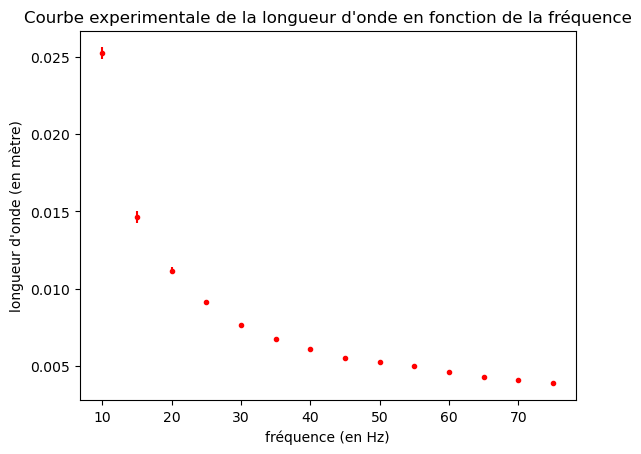

In [3]:
frq = np.array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60 ,65, 70, 75])
lgr1 =  np.array([19/4, 11/4, 10.5/5, 12/7, 11.5/8, 8.9/7, 8/7, 8.3/8, 10.8/11, 11.3/12, 6/7, 4/5, 6.1/8, 6.6/9])*echelle*10**(-2)
ulgr1 = np.array([1/4, 1/4, 0.7/5, 0.7/7, 0.5/8, 0.5/8, 0.5/7, 0.5/8, 0.5/11, 0.5/12, 0.4/7, 0.4/5, 0.4/8, 0.3/9])*echelle*10**(-2)/np.sqrt(12)

plt.figure()
plt.errorbar(frq, lgr1, yerr=ulgr1, fmt='.r')
plt.xlabel('fréquence (en Hz)')
plt.ylabel("longueur d'onde (en mètre)")
plt.title("Courbe experimentale de la longueur d'onde en fonction de la fréquence")
plt.show()

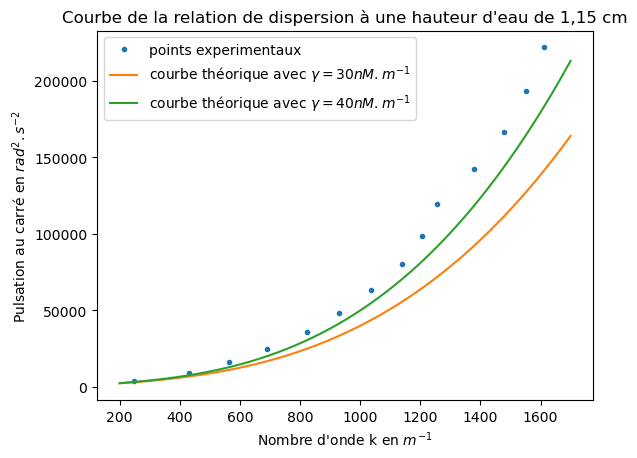

In [4]:
k_theo = np.linspace(200, 1700, 1000)
g = 9.81

gamma1 = 30*10**(-3) #on compare avec deux valeurs de gamma car ce qui nous est donnée dans l'enoncé est un intervalle de valeurs
gamma2 = 40*10**(-3)
mv = 1000
h1 = 0.0115
omegac1_theo = (g*k_theo + gamma1*(k_theo**3)/mv) * np.tanh(k_theo*h1)
omegac2_theo = (g*k_theo + gamma2*(k_theo**3)/mv) * np.tanh(k_theo*h1)

plt.figure()
plt.plot((2*np.pi)/lgr1, (2*np.pi*frq)**2, '.', label='points experimentaux')
plt.plot(k_theo, omegac1_theo, label=r'courbe théorique avec $ \gamma = 30 nM.m^{-1}$')
plt.plot(k_theo, omegac2_theo, label=r'courbe théorique avec $ \gamma = 40 nM.m^{-1}$')
plt.xlabel("Nombre d'onde k en $m^{-1}$")
plt.ylabel('Pulsation au carré en $rad^2.s^{-2}$')
plt.title(r"Courbe de la relation de dispersion à une hauteur d'eau de 1,15 cm")
plt.legend()
plt.show()

On trouve donc que gamma = 0.04875856037011488 N/m avec une incertitude de 0.0004765348916658095 N/m


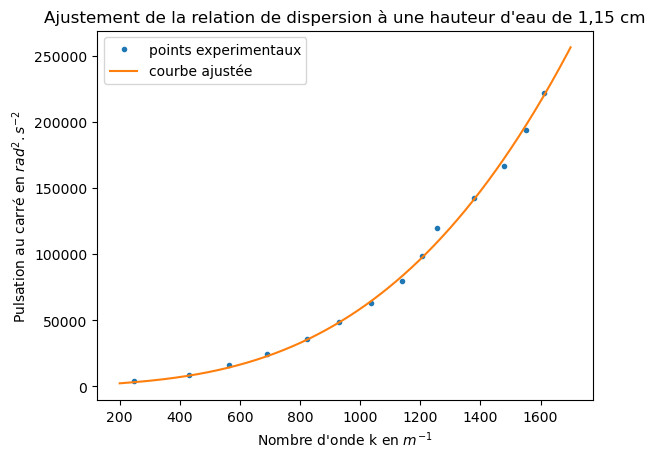

In [5]:
def disp1(k, gamma):
    rho = 1000
    h = 0.0115
    g = 9.81
    omega2 = (g*k + (gamma/rho)*k**3)*np.tanh(h*k)
    return omega2

res1, pcov1 = opt.curve_fit(disp1, (2*np.pi)/lgr1, (2*np.pi*frq)**2)
print('On trouve donc que gamma =', res1[0], 'N/m avec une incertitude de', np.sqrt(np.diag(pcov1))[0], 'N/m' )

plt.figure()
plt.plot((2*np.pi)/lgr1, (2*np.pi*frq)**2, '.', label='points experimentaux')
plt.plot(k_theo, disp1(k_theo, res1), label=r'courbe ajustée')
plt.xlabel("Nombre d'onde k en $m^{-1}$")
plt.ylabel('Pulsation au carré en $rad^2.s^{-2}$')
plt.title(r"Ajustement de la relation de dispersion à une hauteur d'eau de 1,15 cm")
plt.legend()
plt.show()

### 3 - Mesures avec une hauteur d'eau h = 1,30 cm et de l'eau distillée :

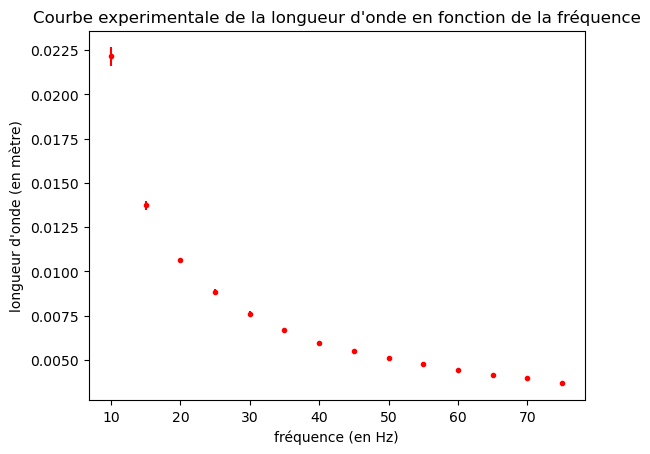

In [6]:
lgr2 =  np.array([12.5/3, 15.5/6, 18/9, 10/6, 10/7, 11.3/9, 12.3/11, 10.4/10, 12.5/13, 12.6/14, 13.3/16, 11/14, 13.5/18, 11.9/17])*echelle*10**(-2)
ulgr2 = np.array([1/3, 1/6, 0.7/9, 0.7/6, 0.7/7, 0.7/9, 0.5/11, 0.5/10, 0.5/13, 0.5/14, 0.5/16, 0.5/14, 0.5/18, 0.5/17])*echelle*10**(-2)/np.sqrt(12)

plt.figure()
plt.errorbar(frq, lgr2, yerr=ulgr2, fmt='.r')
plt.xlabel('fréquence (en Hz)')
plt.ylabel("longueur d'onde (en mètre)")
plt.title("Courbe experimentale de la longueur d'onde en fonction de la fréquence")
plt.show()

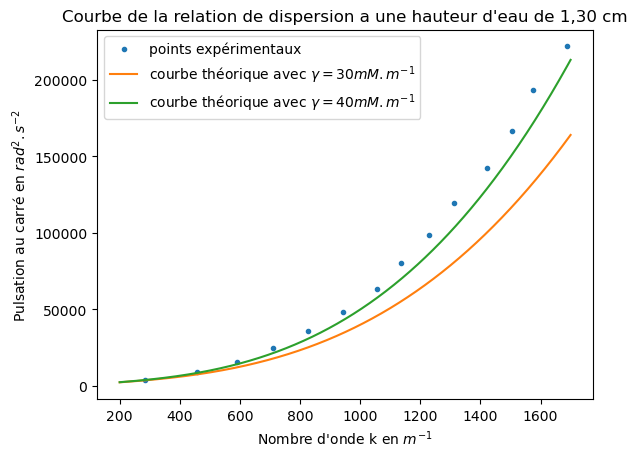

In [7]:
h2 = 0.013
omegac1_theo2 = (g*k_theo + gamma1*(k_theo**3)/mv) * np.tanh(k_theo*h2)
omegac2_theo2 = (g*k_theo + gamma2*(k_theo**3)/mv) * np.tanh(k_theo*h2)

plt.plot((2*np.pi)/lgr2, (2*np.pi*frq)**2, '.', label='points expérimentaux')
plt.plot(k_theo, omegac1_theo2, label=r'courbe théorique avec $\gamma = 30 mM.m^{-1}$')
plt.plot(k_theo, omegac2_theo2, label=r'courbe théorique avec $\gamma = 40 mM.m^{-1}$')
plt.xlabel("Nombre d'onde k en $m^{-1}$")
plt.ylabel('Pulsation au carré en $rad^2.s^{-2}$')
plt.title(r"Courbe de la relation de dispersion a une hauteur d'eau de 1,30 cm")
plt.legend()
plt.show()

On trouve donc que gamma = 0.044541915300776516 N/m avec une incertitude de 0.0004199807299041228 N/m


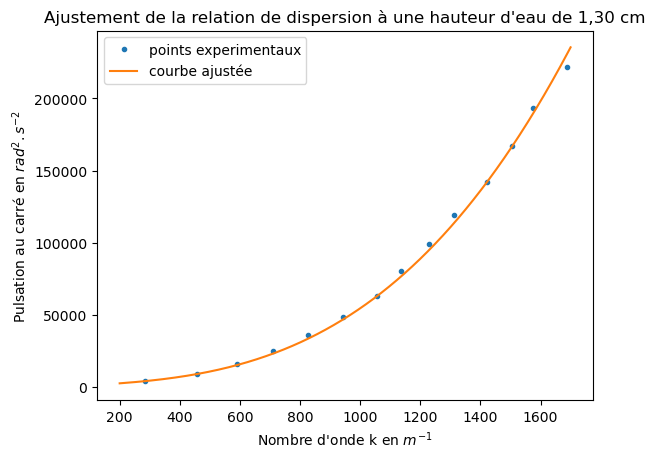

In [8]:
def disp2(k, gamma):
    rho = 1000
    h = 0.0130
    g = 9.81
    omega2 = (g*k + (gamma/rho)*k**3)*np.tanh(h*k)
    return omega2

res2, pcov2 = opt.curve_fit(disp2, (2*np.pi)/lgr2, (2*np.pi*frq)**2)
print('On trouve donc que gamma =', res2[0], 'N/m avec une incertitude de', np.sqrt(np.diag(pcov2))[0], 'N/m' )

plt.figure()
plt.plot((2*np.pi)/lgr2, (2*np.pi*frq)**2, '.', label='points experimentaux')
plt.plot(k_theo, disp2(k_theo, res2), label=r'courbe ajustée')
plt.xlabel(r"Nombre d'onde k en $m^{-1}$")
plt.ylabel(r'Pulsation au carré en $rad^2.s^{-2}$')
plt.title(r"Ajustement de la relation de dispersion à une hauteur d'eau de 1,30 cm")
plt.legend()
plt.show()

### 3 - Mesures avec une hauteur d'eau h = 0,725 cm et un mélange d'eau distillée et deux/15 gouttes de liquide vaisselle :

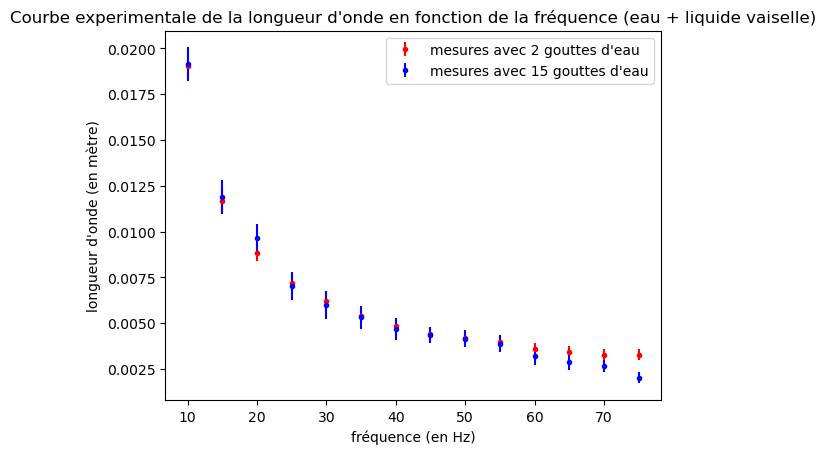

In [9]:
lgr3 =  np.array([(18.2-0.3)/5, 11/5, 10/6, 9.5/7, 7/6, 7.1/7, 5.5/6, 5/6, 7.1/9, 6/8, 5.4/8, 3.9/6, 3.7/6, 3.7/6])*echelle*10**(-2)
ulgr3 = np.array([0.4, 0.4,0.3, 0.3 , 0.3,  0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2])*(echelle*10**(-2))/np.sqrt(12)
lgr4 =  np.array([10.8/3, 6.7/3, 10.9/6, 6.6/5, 4.5/4, 6/6, 4.4/5, 4.1/5, 3.9/5, 5.1/7, 4.2/7, 3.8/7, 3/6, 1.9/5])*echelle*10**(-2)
ulgr4 = np.array([0.6, 0.6, 0.5, 0.5, 0.5, 0.4, 0.4, 0.3, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2])*echelle*10**(-2)/np.sqrt(12)

plt.figure()
plt.errorbar(frq, lgr3, yerr=ulgr3, fmt='.r', label="mesures avec 2 gouttes d'eau")
plt.errorbar(frq, lgr4, yerr=ulgr4, fmt='.b', label="mesures avec 15 gouttes d'eau")
plt.xlabel('fréquence (en Hz)')
plt.legend()
plt.ylabel("longueur d'onde (en mètre)")
plt.title("Courbe experimentale de la longueur d'onde en fonction de la fréquence (eau + liquide vaiselle)")
plt.show()

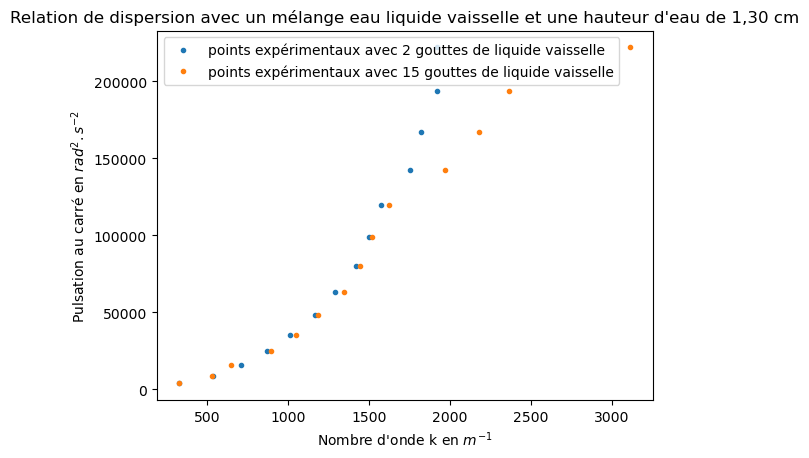

In [10]:
h3 = 0.00725

plt.figure()
plt.plot((2*np.pi)/lgr3, (2*np.pi*frq)**2, '.', label="points expérimentaux avec 2 gouttes de liquide vaisselle")
plt.plot((2*np.pi)/lgr4 , (2*np.pi*frq)**2, '.', label="points expérimentaux avec 15 gouttes de liquide vaisselle")
plt.xlabel("Nombre d'onde k en $m^{-1}$")
plt.ylabel('Pulsation au carré en $rad^2.s^{-2}$')
plt.title(r"Relation de dispersion avec un mélange eau liquide vaisselle et une hauteur d'eau de 1,30 cm")
plt.legend()
plt.show()

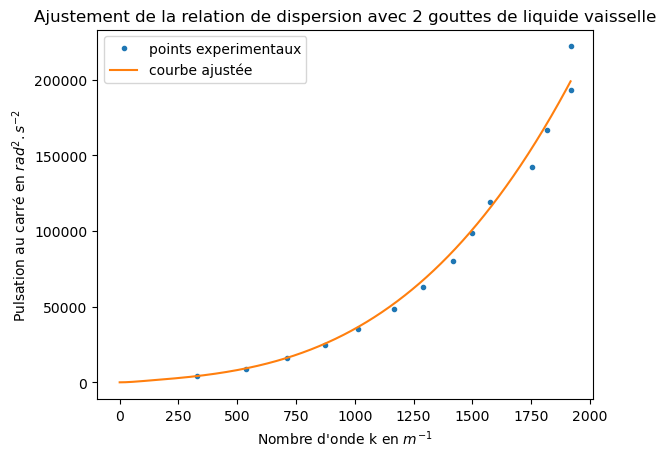

On trouve donc que gamma = 0.025565811276788614 N/m avec une incertitude de 0.0005585483478370293 N/m


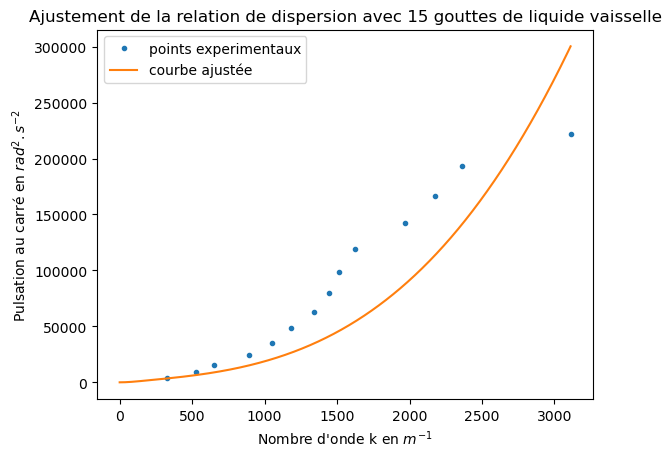

On trouve donc que gamma = 0.008959852125692358 N/m avec une incertitude de 0.0012114232984990162 N/m


In [11]:
def disp3(k, gamma):
    rho = 1000
    h = 0.0125
    g = 9.81
    omega2 = (g*k + (gamma/rho)*k**3)*np.tanh(h*k)
    return omega2

def disp4(k, gamma):
    rho = 1000
    h = 0.00725
    g = 9.81
    omega2 = (g*k + (gamma/rho)*k**3)*np.tanh(h*k)
    return omega2

res3, pcov3 = opt.curve_fit(disp3, (2*np.pi)/lgr3, (2*np.pi*frq)**2, [60*10**(-3)])
res4, pcov4 = opt.curve_fit(disp4, (2*np.pi)/lgr4, (2*np.pi*frq)**2, [60*10**(-3)])

k_theo3 = np.linspace(0, 2*np.pi/lgr3[-1], 1000)
k_theo4 = np.linspace(0, 2*np.pi/lgr4[-1], 1000)


plt.figure()
plt.plot((2*np.pi)/lgr3, (2*np.pi*frq)**2, '.', label='points experimentaux')
plt.plot(k_theo3, disp3(k_theo3, res3), label=r'courbe ajustée')
plt.xlabel(r"Nombre d'onde k en $m^{-1}$")
plt.ylabel(r'Pulsation au carré en $rad^2.s^{-2}$')
plt.title(r"Ajustement de la relation de dispersion avec 2 gouttes de liquide vaisselle")
plt.legend()
plt.show()
print('On trouve donc que gamma =', res3[0], 'N/m avec une incertitude de', np.sqrt(np.diag(pcov3))[0], 'N/m' )

plt.figure()
plt.plot((2*np.pi)/lgr4, (2*np.pi*frq)**2, '.', label='points experimentaux')
plt.plot(k_theo4, disp4(k_theo4, res4), label=r'courbe ajustée')
plt.xlabel(r"Nombre d'onde k en $m^{-1}$")
plt.ylabel(r'Pulsation au carré en $rad^2.s^{-2}$')
plt.title(r"Ajustement de la relation de dispersion avec 15 gouttes de liquide vaisselle")
plt.legend()
plt.show()
print('On trouve donc que gamma =', res4[0], 'N/m avec une incertitude de', np.sqrt(np.diag(pcov4))[0], 'N/m' )


Il y a peut etre eu un problème sur les mesures avec 15 gouttes de liquide vaisselle, surement dû à de la mousse car il avait du savon quand la fréquence était élévée. On essaye de refaire mais uniquememnt avec les 10 premières mesures.

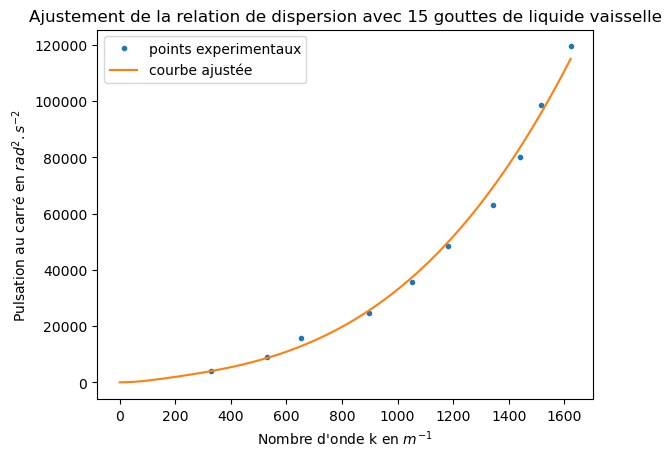

On trouve donc que gamma = 0.023175588425105698 N/m avec une incertitude de 0.0004639632953164635 N/m


In [12]:
res4b, pcov4b = opt.curve_fit(disp4, (2*np.pi)/lgr4[:10], (2*np.pi*frq[:10])**2, [60*10**(-3)])

k_theo4b = np.linspace(0, 2*np.pi/lgr4[9], 1000)

plt.figure()
plt.plot((2*np.pi)/lgr4[:10], (2*np.pi*frq[:10])**2, '.', label='points experimentaux')
plt.plot(k_theo4b, disp4(k_theo4b, res4b), label=r'courbe ajustée')
plt.xlabel(r"Nombre d'onde k en $m^{-1}$")
plt.ylabel(r'Pulsation au carré en $rad^2.s^{-2}$')
plt.title(r"Ajustement de la relation de dispersion avec 15 gouttes de liquide vaisselle")
plt.legend()
plt.show()
print('On trouve donc que gamma =', res4b[0], 'N/m avec une incertitude de', np.sqrt(np.diag(pcov4b))[0], 'N/m' )


On trouve maintenant un résultat plus cohérant, avec une tension de surface qui est aussi assez proche de la tension de surface trouvée lors de l'experience avec 2 goutes de liquide vaisselle.

### 4 - Mesures avec une hauteur d'eau h = 1,2 cm et un mélange d'eau distillée et de glycérol :

In [13]:
#unités gramme, litre, gramme/litre 
mvgly = 1260
mveau = 1000

mgly = 189.2+117.9-4.8
meau = 499.8

volgly = mgly/mvgly
voleau = meau/mveau
print('La concentration de glycérol est de ', volgly*100/(voleau+volgly), '%')

La concentration de glycérol est de  32.433951899472994 %


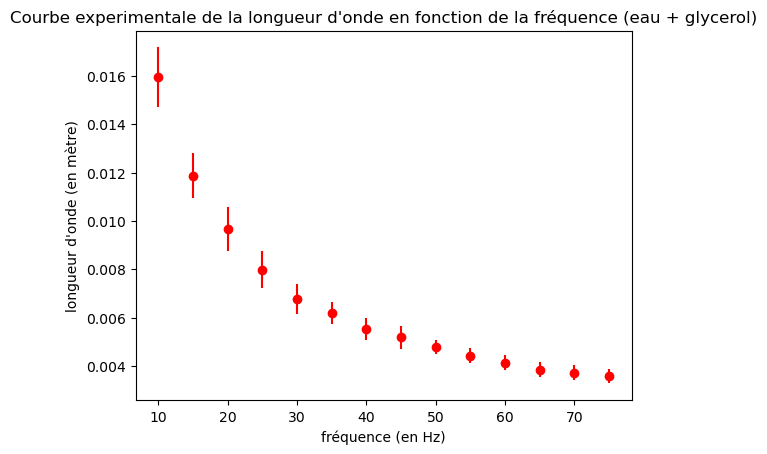

In [14]:
lgr5 =  np.array([9/3, 6.7/3, 9.1/5, 9/6, 5.1/4, 3.5/3, 5.2/5, 3.9/4, 4.5/5, 5/6, 3.9/5, 2.9/4, 2.8/4, 2.7/4])*echelle*10**(-2)
ulgr5 = np.array([0.8, 0.6, 0.6, 0.5, 0.4, 0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2])*echelle*10**(-2)/np.sqrt(12)

plt.figure()
plt.errorbar(frq, lgr5, yerr=ulgr5, fmt='or')
plt.xlabel('fréquence (en Hz)')
plt.ylabel("longueur d'onde (en mètre)")
plt.title("Courbe experimentale de la longueur d'onde en fonction de la fréquence (eau + glycerol)")
plt.show()

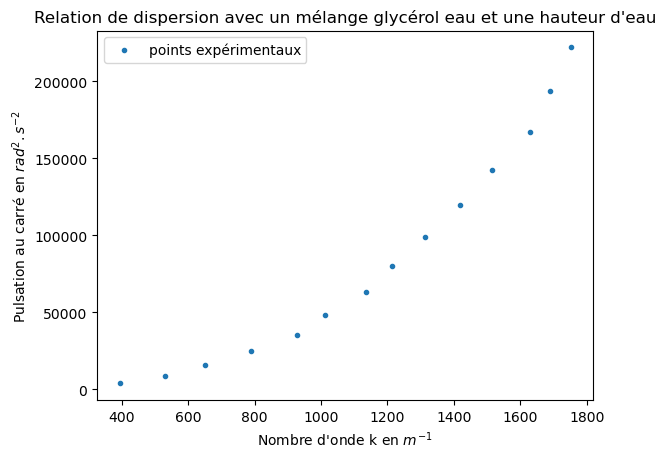

In [15]:
h4 = 0.012
rho1 = (mgly+meau)/(volgly+voleau)

plt.figure()
plt.plot((2*np.pi)/lgr5, (2*np.pi*frq)**2, '.', label='points expérimentaux')
plt.xlabel("Nombre d'onde k en $m^{-1}$")
plt.ylabel('Pulsation au carré en $rad^2.s^{-2}$')
plt.title(r"Relation de dispersion avec un mélange glycérol eau et une hauteur d'eau")
plt.legend()
plt.show()

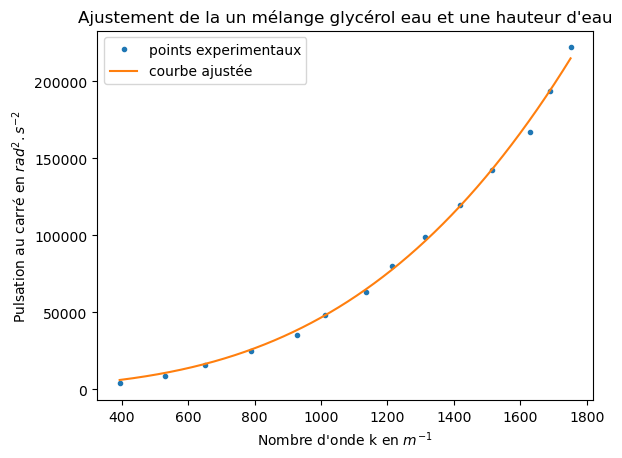

[0.03990849] [0.00037726] 1084.3282749386299


In [16]:
def disp5(k, gamma):
    rho = rho1
    h = 0.017
    g = 9.81
    omega2 = (g*k + (gamma/rho)*k**3)*np.tanh(h*k)
    return omega2

res5, pcov5 = opt.curve_fit(disp5, (2*np.pi)/lgr5, (2*np.pi*frq)**2, [50*10**(-3)])
k_theo5 = np.linspace(2*np.pi/lgr5[0], 2*np.pi/lgr5[-1], 1000)

plt.figure()
plt.plot((2*np.pi)/lgr5, (2*np.pi*frq)**2, '.', label='points experimentaux')
plt.plot(k_theo5, disp5(k_theo5, res5), label=r'courbe ajustée')
plt.xlabel(r"Nombre d'onde k en $m^{-1}$")
plt.ylabel(r'Pulsation au carré en $rad^2.s^{-2}$')
plt.title(r"Ajustement de la un mélange glycérol eau et une hauteur d'eau")
plt.legend()
plt.show()
print(res5, np.sqrt(np.diag(pcov5)), rho1)

### 5 - Conclusion de l'expérience :
- On voit sur les graphes que les valeurs correspondent bien au modèle décrit par la relation de dispersion, comme on avait pu le supposer, quelque soit le liquide utilisé.
- On voit aussi que la hauteur d'eau n'a pas beaucoup d'influence sur les valeurs de longueur d'onde.
- On peut dire que d'après les graphes et les ajustements, on peut supposer que $\gamma$ de l'eau utilisé est entre $44 mM.m^{-1}$ et $49 mM.m^{-1}$ ; que lorsqu'on ajoute du liquide vaisselle la tension de surface diminue. On aurait pu pensé que lorsqu'on ajoute du glycerol à l'eau la tension de surface augmente, et qui devrait logiquement restée entre celle du l'eau et du glycérol (qui est d'environ $64 mM.m^{-1}$), ce qui n'est pas du tout la cas d'après l'ajustement. Le graphe obtenu nous donne une tension de surface de $40 mM.m^{-1}$.

___

In [17]:
print(lgr1, lgr2, lgr3, lgr4, lgr5)

[0.02524537 0.01461574 0.01116111 0.00911111 0.00764005 0.00675741
 0.00607407 0.00551412 0.00521818 0.00500478 0.00455556 0.00425185
 0.00405255 0.00389753] [0.02214506 0.01372994 0.01062963 0.00885802 0.00759259 0.00667305
 0.00594293 0.00552741 0.0051104  0.00478333 0.00441794 0.00417593
 0.00398611 0.00372037] [0.01902704 0.01169259 0.00885802 0.00721296 0.00620062 0.00539074
 0.00487191 0.00442901 0.0041928  0.00398611 0.0035875  0.00345463
 0.00327747 0.00327747] [0.01913333 0.01186975 0.00965525 0.00701556 0.00597917 0.00531481
 0.00467704 0.00435815 0.00414556 0.00387222 0.00318889 0.00288519
 0.00265741 0.00201963] [0.01594444 0.01186975 0.00967296 0.00797222 0.00677639 0.00620062
 0.00552741 0.00518194 0.00478333 0.00442901 0.00414556 0.00385324
 0.00372037 0.0035875 ]


# Expérience 2 : Interférences

### 1 - But et explications de l'expérience :

**But :** On observe le comportement des fronts d'ondes (ici circulaires) lorsqu'il y a plusieurs sources de vibrations et on essaye de l'interpreter.

**Explications :** On utilise une ou plusieurs sources de vibrations, qui génerent des ondes ciruclaires, on fait varier la fréquence (en ayant toujours des sources de fréquences identiques) et la distance entre ces deux sources tout en fixant la hauteur d'eau : 

- 1 source - fréquences : $12$, $18$, $24$, $47 Hz$
- 2 sources espacées de $(3,40 \pm 0,23) cm$ - fréquences : $12, 18, 24, 34, 47, 55 Hz$
- 2 sources espacées de $(14,10 \pm 0,40) cm$ - fréquences : $12, 18, 24, 34, 47, 55 Hz$
- 3 sources espacées chacune de $(7,10 \pm 0,40) cm$ - fréquences : $12, 18, 24, 34, 47, 55 Hz$
- 3 sources espacées chacune de $(4,05 \pm 0,38) cm$ - fréquences : $12, 18, 24, 34, 47, 55 Hz$
- 2 sources espacées de $(8,05 \pm 0,43) cm$ - fréquences : $12, 18, 24, 34, 47, 55 Hz$
- 4 sources espacées chacune de $(4,25 \pm 0,43) cm$ - fréquences : $12, 18, 24, 34, 47, 55 Hz$

In [18]:
s21 = (3 + 3.8)/2
us21 = (3.8 - 3)/np.sqrt(12)
print(s21, us21)

s22 = (13.4 + 14.8)/2
us22 = -(13.4 - 14.8)/np.sqrt(12)
print(s22, us22)

s31 = (6.4 + 7.8)/2
us31 = (7.8 - 6.4)/np.sqrt(12)
print(s31, us31)

s32 = (4.7 + 3.4)/2
us32 = (4.7 - 3.4)/np.sqrt(12)
print(s32, us32)

s23 = (7.3 + 8.8)/2
us23 = (8.8 - 7.3)/np.sqrt(12)
print(s23, us23)

s41 = (3.5 + 5)/2
us41 = (5 - 3.5)/np.sqrt(12)
print(s41, us41)

3.4 0.23094010767585027
14.100000000000001 0.40414518843273817
7.1 0.4041451884327379
4.05 0.37527767497325687
8.05 0.43301270189221963
4.25 0.43301270189221935


### 2 - Mesures / photo de l'expérience :

In [19]:
img1 = plt.imread("S1.jpg")
plt.imshow(img1)
plt.title('1 source')
plt.axis('off')
plt.show()

img2 = plt.imread("S2P.jpg")
plt.imshow(img2)
plt.title('Interférences avec 2 sources proches')
plt.axis('off')
plt.show()

img3 = plt.imread("S2M.jpg")
plt.imshow(img3)
plt.title('Interférences avec 2 sources moyennement espacées')
plt.axis('off')
plt.show()

img4 = plt.imread("S2L.jpg")
plt.imshow(img4)
plt.title('Interférences avec 2 sources trés éloignées')
plt.axis('off')
plt.show()

img5 = plt.imread("S3P.jpg")
plt.imshow(img5)
plt.title('Interférences avec 3 sources proches')
plt.axis('off')
plt.show()

img6 = plt.imread("S3M.jpg")
plt.imshow(img6)
plt.title('Interférences avec 3 sources moyennement espacées')
plt.axis('off')
plt.show()

img7 = plt.imread("S4.jpg")
plt.imshow(img7)
plt.title('Interférences avec 4 sources')
plt.axis('off')
plt.show()

img8 = plt.imread("legend.jpg")
plt.imshow(img8)
plt.title('Légende')
plt.axis('off')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/schetterl/S4 - PHY EXP/S1.jpg'

On peut remarquer que pour toutes les situations les ondes si comportent toutes de la même façon, elles ne sont pas déformées, mais elles se superposent, on appelle ce phénomène le phénomène d'interférence.

On peut remarquer qu'à certains endroits les maximas de chaque onde ou les minimas de chaque onde se croisent, les ondes se superposent et leurs amplitudes s'additionnent, on appelle ça des interférences constructives : à ces endroits, l'amplitude est maximale (en valeur absolue) : ces interférences sont toutes placées sur les lignes qu'on appelle lignes de tempête.
 
On voit aussi qu'à certains autres endroits le maximum d'une onde croise le minimum de l'autre et les ondes se superposent, et comme les deux amplitudes sont les mêmes mais l'une négative et l'autre positive, les amplitudes s'additionnent donc l'amplitude totale est nulle : on appelle ça des interférences destructives, et elles sont situées sur plusieurs lignes : des lignes de repos.

On observe aussi que si on regarde la différence de marche entre deux sources, c'est-à-dire qu'on regarde à un point donné la différence entre sa distance à une source et sa distance à l'autre source, on trouve des résultats particuliers au point où il y a des interférence constructives et au point où il y a des interférences destructives :
- interférences constructives : on trouve une différence de marche qui est un multiple de la longueur d'onde : $\delta = k \lambda$, avec $k \in \mathbb{Z}$ ; en particulier, pour chaque points d'une ligne de tempête donnée, on trouve la même différence de marche.
- interférences destructives : on trouve cette fois ci une différence de marche qui est un multiple d'une ligne d'onde et demi c'est-à-dire $\delta = ( k + \frac{1}{2})\lambda$, avec $k \in \mathbb{Z}$ ; et dans ce cas on trouve que pour chaque points d'une ligne de repos donnée, on trouve la même différence de marche.

### 3 - Conclusion de l'experience :
- On remarque qu'en présence de plusieurs sources, les ondes ne sont pas deformées, mais elles se superposent, en faisant apparaitre des interférences constructives et destructives.



___

# Experience 3 - Diffraction

### 1- But et explication de l'expérience :

**But :** On regarde le comportement d'une onde lorsqu'elle passe par une fente.

**Explication :** On génere une onde plane, et on met sur son trajet une fente pour voir le comportement de l'onde à travers cette fente.
On fait varier la taille des fentes, on regarde si les caractéristiques de l'onde sont conservées :
- on trace le graphe des longueurs d'ondes en fonction des fréquences, et on le compare aux valeurs trouvées lorsque de la première expérience.
- on prend en photo et on regarde la forme du front d'onde et l'amplitude.

### 2 - Mesures / photos de l'expérience :

In [ ]:
# ecart 0,49 cm
frq3 = np.array([12, 18, 24])
lgr3 = np.array([(100-30)/2 ,(150-55)/ 4,(105-10)/5 ])*echelle*10**(-2)/10

# ecart 2,11 cm
frq4 = np.array([18, 27, 35])
lgr4 = np.array([ (120-10)/5, (103-40)/4 , 90/7])*echelle*10**(-2)/10

plt.figure()
plt.plot(frq, lgr1, '-r' ,label='sans fente ni obstacle')
plt.plot(frq3, lgr3,  '.b' ,label='fente de 0,49cm')
plt.plot(frq4, lgr4,  '.g' ,label='fente de 2,11cm')
plt.xlabel('Fréquences en Hz')
plt.ylabel("Longueurs d'onde en metres")
plt.title("Longueurs d'onde en fonction de la fréquence en présence d'une fente")
plt.legend()
plt.savefig('fiddif')
plt.show()

On remarque que les longeurs d'ondes sont conservées, quelque soit la taille de la fente 

In [ ]:
img9 = plt.imread("Diffraction.jpg")
plt.imshow(img9)
plt.title('Diffraction')
plt.axis('off')
plt.show()

### 3 - Conclusion de l'expérience : 

- On a dans un premier temps que les fréquences sont conservées lorsque les ondes passent pas une ou plusieurs fentes.
- On voit aussi que l'amplitude semble conservée.
- On peut néanmoins dire que le forme du front d'onde n'est pas conversée car lorsque qu'une onde plane passe par une fente elle devient alors une onde circulaire.

______

# Autres observations

- En utilisant un laser, on peut avec une mesure approximative de l'amplitude. Avec cette méthode, peut trouver qu'a environ 12 Hz, l'amplitude est maximale. On appelle cette fréquence d'une fréquence de résonnance

In [ ]:
plt.figure
plt.plot((2*np.pi)/lgr1, (2*np.pi*frq)**2, '.r', label="points expérimentaux à hauteur d'eau = 1,15cm")
plt.plot((2*np.pi)/lgr2, (2*np.pi*frq)**2, '.b', label="points expérimentaux à hauteur d'eau = 1,30cm")
plt.xlabel("Nombre d'onde k en $m^{-1}$")
plt.ylabel('Pulsation au carré en $rad^2.s^{-2}$')
#plt.title(r"Relation de dispersion avec un mélange glycérol eau et une hauteur d'eau")
plt.legend()
plt.savefig('fig11')
plt.show()

In [ ]:
plt.figure()
plt.plot(((2*np.pi)/lgr3), (2*np.pi*frq)**2, '.r', label="points expérimentaux 2 gouttes de liquide vaisselle")
plt.plot((2*np.pi)/lgr4, (2*np.pi*frq)**2, '.b', label="points expérimentaux avec 15 gouttes de liquide vaisselle")
plt.xlabel("Nombre d'onde k en $m^{-1}$")
plt.ylabel('Pulsation au carré en $rad^2.s^{-2}$')
#plt.title(r"Relation de dispersion avec un mélange glycérol eau et une hauteur d'eau")
plt.legend()
plt.savefig('fig12')
plt.show()

In [ ]:
plt.figure()
plt.plot(((2*np.pi)/lgr5), (2*np.pi*frq)**2, '.r', label="points expérimentaux eau + glycérol")
plt.xlabel("Nombre d'onde k en $m^{-1}$")
plt.ylabel('Pulsation au carré en $rad^2.s^{-2}$')
#plt.title(r"Relation de dispersion avec un mélange glycérol eau et une hauteur d'eau")
plt.legend()
plt.savefig('fig13')
plt.show()

In [ ]:
plt.figure
plt.plot((2*np.pi)/lgr1, (2*np.pi*frq)**2, '.r', label="points expérimentaux h = 1,15cm")
plt.plot((2*np.pi)/lgr2, (2*np.pi*frq)**2, '.b', label="points expérimentaux h = 1,30cm")
plt.plot(k_theo, disp1(k_theo, res1), 'r', label=r'courbe ajustée h=1,15cm')
plt.plot(k_theo, disp2(k_theo, res2), 'b', label=r'courbe ajustée h=1,30cm')
plt.xlabel("Nombre d'onde k en $m^{-1}$")
plt.ylabel('Pulsation au carré en $rad^2.s^{-2}$')
#plt.title(r"Relation de dispersion avec un mélange glycérol eau et une hauteur d'eau")
plt.legend()
plt.savefig('fig21')
plt.show()

In [ ]:
plt.figure
plt.plot((2*np.pi)/lgr3, (2*np.pi*frq)**2, '.r', label="points expérimentaux 2 gouttes liquide vaisselle")
plt.plot((2*np.pi)/lgr4, (2*np.pi*frq)**2, '.b', label="points expérimentaux 15 gouttes liquide vaisselle")
plt.plot(k_theo3, disp3(k_theo3, res3), 'r',label=r'courbe ajustée 2g')
plt.plot(k_theo4, disp4(k_theo4, res4), 'b', label=r'courbe ajustée 15g')
plt.xlabel("Nombre d'onde k en $m^{-1}$")
plt.ylabel('Pulsation au carré en $rad^2.s^{-2}$')
#plt.title(r"Relation de dispersion avec un mélange glycérol eau et une hauteur d'eau")
plt.legend()
plt.savefig('fig22')
plt.show()

In [ ]:
plt.figure
plt.plot((2*np.pi)/lgr3, (2*np.pi*frq)**2, '.r', label="points expérimentaux 2 gouttes liquide vaisselle")
plt.plot((2*np.pi)/lgr4, (2*np.pi*frq)**2, '.b', label="points expérimentaux 15 gouttes liquide vaisselle")
plt.plot(k_theo3, disp3(k_theo3, res3), 'r',label=r'courbe ajustée 2g')
plt.plot(k_theo4b, disp4(k_theo4b, res4b), 'b', label=r'courbe ajustée 15g')
plt.xlabel("Nombre d'onde k en $m^{-1}$")
plt.ylabel('Pulsation au carré en $rad^2.s^{-2}$')
#plt.title(r"Relation de dispersion avec un mélange glycérol eau et une hauteur d'eau")
plt.legend()
plt.savefig('fig22b')
plt.show()

In [ ]:
plt.figure
plt.plot((2*np.pi)/lgr5, (2*np.pi*frq)**2, '.r', label="points expérimentaux eau + glycérol")
plt.plot(k_theo5, disp5(k_theo5, res5), 'r',label=r'courbe ajustée')
plt.xlabel("Nombre d'onde k en $m^{-1}$")
plt.ylabel('Pulsation au carré en $rad^2.s^{-2}$')
plt.legend()
plt.savefig('fig23')
plt.show()